# Week 1: Introduction to Computation in Python

name :Manav Bilakhia

Date: 9th september 2022

# Place all Library imports in this section

In [121]:
import math
import numpy as np
import matplotlib.pyplot as plt
import time
import statistics

# Functions, Command Structures, Arrays, and Plots

## Heaviside Function

<font color = blue>
The heaviside function is usually defined as

$$
f(x) = \left\{\begin{array}{rcl} 0 & \mbox{for} & x < 0 \\ 1 & \mbox{for} & x > 0 \end{array}\right.
$$

along with the special case $f(0) = \frac{1}{2}$.

### Simple Version

<font color = blue>
Use the "if" control structure to define a function f(x) such that

$$
f(x) = \left\{\begin{array}{rcl} 0 & \mbox{for} & x \le 0 \\ 1 & \mbox{for} & x > 0 \end{array}\right.
$$


In [122]:
def foo(x):
    """
        if input is positive returns 1 else 0
        :param x: (int)
        :return: (int)  0 or 1
        """
    if (x <=0):
        return 0
    else:
        return 1
foo(-5)

0

This is a simple if-else construct inside the function foo

### Full Version

<font color = blue>
Now use an "elif" structure to incorporate the special case $f(0) = \frac{1}{2}$.

In [123]:
def foo(x):
    """
        if input is positive, returns 1. For negative returns 0 and for 0 returns 0.5
        :param x: (int)
        :return: (int/float)  0 or 1 or 0.5
        """
    if (x <0):
        return 0
    elif( x == 0):
        return 0.5
    else:
        return 1
foo(0)

0.5

The old foo function has now been redefined to accomodate the special input case of 0 where it returns a value of 0.5. 

## Sine Function

<font color = blue>
We know that we can approximate the sine function using the Taylor series

$$
\sin(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} +\cdots
$$

### Truncated Taylor Series

<font color = blue>
Create a function that takes two inputs: a variable "x" and an integer "k", and outputs the Taylor series approximation of sin(x), truncated after k terms.  To do this you can use the factorial function from the "math" library, and the "sum" function for adding up the elements of a list.  If necessary, look these functions up on the internet.  Make sure to test your function out thoroughly.

In [124]:
def taylor (x,k):
    """
     Computes the sumation of the taylor series expansion for f(x) = sin x
    :param x: (int) angle in radians
    :param k: (int) number of terms in the Taylor Expansion
    :return: (int/float) the sumation of the first k elements of the Taylor expansion
     """
    sum = 0
    for n in range (k):
        sum = sum + ((math.pow(-1,n))* (math.pow(x,(2*n)+1))/math.factorial((2*n)+1)) 
    return sum
taylor ((math.pi), 20) #taylor expansion of sin(pi) for 20 terms
                     

3.328056696979873e-16

### Error Message

<font color = blue>
Modify your function so that if the input value of "k" is not a positive integer, your function does two SEPARATE things: first, it **prints** an appropriate error message, and then it **returns** a value that cannot possibly be the output of sin(x) for any real value of x.  

Note: to do this you need a way to determine whether a variable is or is not an integer.  There are many possible solutions, but one way is to try "rounding" the value of "k" to the nearest integer, and see if the result is still the same as "k".

In [125]:
def taylor(x,k):
    """
    Computes the sumation of the taylor series expansion for f(x) = sin x
    :param x: (int) angle in radians
    :param k: (int) number of terms in the Taylor Expansion
    :return: (int/float) the sumation of the first k elements of the Taylor expansion
    """
    sum = 0
    for n in range (k):
        sum = sum + ((math.pow(-1,n))* (math.pow(x,(2*n)+1))/math.factorial((2*n)+1)) # stores the total sum
    return(sum)

def improved_taylor(x,k):
    """
    Takes care of special cases and error
    :param x: (int) angle in radians
    :param k: (int) number of terms in the Taylor Expansion
    :return: (int/float) the return value for the taylor(x,k) function
     """
    if (k<=0):
        k = abs(k)
        k=round(k)
        print ("value of k input is not positive. The answer below is not correct")
        return(taylor(x,k))
    elif (type(k)!= int):
        k=round(k)
        print ("value of k input is not a real integer. The answer below is not correct")
        return(taylor(x,k))
    else:
        return(taylor(x,k))
improved_taylor((math.pi), -20.5)      
        

value of k input is not positive. The answer below is not correct


3.328056696979873e-16

The above block code combines the old Taylor Series function taylor(x,k) and adds on to it by displaying an error message if the input for the number of terms (k) in the Taylor series expansion is negative or not an integer. If the input is nergative, the code converts to its absolite value and calculates the sum for the absolute value. If the input (k) is not an integer, the code rounds it to the nearest integer and calculates the sum. If the input is a non-integer negative then it first calculates the absoliut value, rounds it to the nearest integer and then calculates the sum. In all the of the above mentioned cases, a corresponding error message is displayed with the incorrect sum of the taylor expansion. 

### Accuracy

<font color = blue>
Now use your function to determine how large "k" must be in order for sin(0.5) to be accurate to 10 decimal places.  You must do this WITHOUT using any built-in sin function, external calculator, or table of values for comparison.  

In [126]:
round(improved_taylor(0.5,5),10) # estimates the value of sin(0.5) accurate to 10 decimal places. 

0.4794255386

## Factorial Function

<font color = blue>
The factorial is a function generally defined for positive integers, so that

$$
k! = k \times (k-1) \times (k-2) \times \cdots (2) \times (1)
$$

Create your own function with a single input "k" which computes the factorial using a "for" loop.  Make sure your function will work for the special case $0! = 1$ as well.

In [127]:
def factorial(k):
    """
    Calculates the factorial of an input recurssively
    :param k: (int) factorial to be counted
    :return: (int) the factorial of input k
    """
    if  k == 0: # base case 1
        return 1
    elif k == 1: # base case 2
        return k
    else:
        return k*factorial(k-1) # recurssive call 
factorial(5)

120

## Homework Grades

<font color = blue>
A common grading policy is to drop the lowest homework grade from a student's final grade.  What we want to do is construct a module that implements this policy, accepting as an input a list of grades, and outputing the final grade as a percentage.  You can assume that every homework assignment is scored out of 20 poitns, but do not assume anything about the number of assignmnts that have been turned in.  You must do this without using any built-in "sorting" functions, though you can use a built-in function to determine the length of the input list of grades.

### Minimum Value

<font color = blue>
Begin by creating a function that inputs a list of numbers, and outputs the lowest number in that list.

In [128]:
def find_min(list):
    """
    Finds the minimum value in a list
        :param list: list of numbers whose minumum is to be found
        :return: the minimum of a given list 
    """
    lowest = list[0]
    for grade in list:
        if grade < lowest: # selects the lowest possible grade
            lowest = grade
    print("Lowest grade is:")
    return lowest
find_min([15,9,20,0])

Lowest grade is:


0

### Final Grade

<font color = blue>
Now use the above function to create a function which generates the final homework percentage.  Check your function on the lists [15,9,20,0] and [15,20]

In [129]:
def grading(list):
    """ Removes the min from the list using find_min(list) and computes the final homework percentage 
        :param list: list of numbers 
        :return: the final homework percentage
    """
    list.remove(find_min(list)) #  removes the lowest grade
    final_sum = sum(list) #calculates the sum 
    return (final_sum)/(len(list)*20)*100 # calculates the percetage and returns it
grading([15,9,20,0])

Lowest grade is:


73.33333333333333

## Numpy Arrays

<font color = blue>
If you want to mathematically manipulate large data sets, using the basic python "list" structure isn't ideal.  Instead, we will be using the numerical python library "numpy" and the "array" structure it uses.  Rules for manipulating numpy arrays are somewhat different than those for lists, so this section is designed to start getting you familiar with these rules.

You will want to begin by importing the numpy library into your notebook.

### Creating Numpy Arrays

<font color = blue>
Look up the basic numpy.array command, and use it to convert the two basic lists [1,2,3] and [[1,2], [3,4]] into numpy arrays.  


Next, try to convert the list [[1,2], [3,4,5]] into a numpy array.  What happens?


Finally, create a numpy array of the first 100 positive integers (without typing them in one by one.)

In [130]:
lst1 = [1,2,3] #works
arr1 = np.array(lst1)
print(arr1)

lst2 = [[1,2], [3,4]] #works
arr2 = np.array(lst2)
print(arr2)

lst3 = [[1,2], [3,4,5]] # will not work
arr3 = np.array(lst3)
print(arr3)

[1 2 3]
[[1 2]
 [3 4]]
[list([1, 2]) list([3, 4, 5])]


C:\Users\manav\AppData\Local\Temp\ipykernel_26164\2926792958.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr3 = np.array(lst3)


In the first two cases, we see that the list is converted to a numpy array. Case 1 is a single dmensional list. Case 2 also gets conveted as it a uniformly sized 2 dimensional list where as we see in case 3 that it cannot be converted to a numpy array as the size of the sub arrays is not uniform. This can be solved by either adding an extra dummy element to all the other sublist or by specifying the object type as a  parameter to the .array() function. 

### Basic Mathematical Operations on Arrays

<font color = blue>
Create two numpy arrays to experiment with: "list1" and "list2".  Make sure each has four members.

Then, compute the following:

list1 * list2

list1 + list2

list1 * 3

list2 - 4

Explain briefly how basic mathematical operations work on numpy arrays.

In [131]:
list1 = [1,2,3,4]
arr1 = np.array(list1)
print("arr1 "+ str(arr1))

list2 = [5,6,7,8]
arr2 = np.array(list2)
print("arr2 "+ str(arr2))

#print("list1 * list2"+ str(list1 * list2))
print("arr1 * arr2 "+ str(arr1 * arr2))

print("list1 + list2 "+ str(list1 + list2))
print("arr1 + arr2 "+ str(arr1 + arr2))

print("list1 * 3 "+ str(list1 * 3))
print("arr1 * 3 "+ str(arr1 * 3))

#print("list2 - 4 "+ str(list2 - 4))
print("arr2 - 4 "+ str(arr2 - 4))


arr1 [1 2 3 4]
arr2 [5 6 7 8]
arr1 * arr2 [ 5 12 21 32]
list1 + list2 [1, 2, 3, 4, 5, 6, 7, 8]
arr1 + arr2 [ 6  8 10 12]
list1 * 3 [1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4]
arr1 * 3 [ 3  6  9 12]
arr2 - 4 [1 2 3 4]


List * list     :does not work
np_arr * np_arr :multiplies its individual elements 
list + list     :concatinates them
np_arr + np_arr :adds its individual elements
int * list      :copies the list int times and concatinates them
int * np_arr    :multiplies the each element of the list with int
list - int      :does not work
np_arr - int    :subtracts int from each element of the array 

### Accessing Elements and Determining Length

<font color = blue>
Confirm that you can access the elements in a numpy array, and determine its length, the same way you would for a normal list.

Also test this on a third list: list3 = np.array([[1,5], [2,4]])

In [132]:
List2 = np.array([1,5,2,4])
print ("size = ",List2.size)
for i in range (List2.size): # accessing each elemt of the np array by looping just like lists 
    print(List2[i])
list3 = np.array([[1,5], [2,4]])
print ("size = ",list3.size) # length of the array
print ("shape = ",list3.shape) # dimensions of a multi dimention array`
print(np.matrix(list3))

size =  4
1
5
2
4
size =  4
shape =  (2, 2)
[[1 5]
 [2 4]]


### Numpy Functions vs. Math Functions

<font color = blue>
The numpy library has many of the same functions as the math library, but they work somewhat differently, especially in terms of arrays.  Compute first numpy.sin(list1) and then math.sin(list1), and compare the results. Also try using a standard python list as the input, instead of a numpy array. What does each do?

In [133]:
list1 = np.array([1,5,2,4])
print(np.sin(list1))
#print(math.sin(list1)) 
list2 = [1,5,2,4]
print(np.sin(list2))
#print(math.sin(list2))

[ 0.84147098 -0.95892427  0.90929743 -0.7568025 ]
[ 0.84147098 -0.95892427  0.90929743 -0.7568025 ]


This is interesting as np.sin works on both numpy arrays and lists but math.sin works on neither. np.sin calculates the sin value of each element in the array and returns that as an array.

### Appending Elements

<font color = blue>
Look up how to append elements to the end of a numpy array, and demonstrate this by appending the element "5" to your previously created "list1".  Also determine and demonstrate how to append an "ordered pair" to a numpy array of ordered pairs.

In [134]:
list1 = np.append(list1,5)
print(list1)

[1 5 2 4 5]


Append creates a copy of the already existing list which then needs to be assigned to the same list so that the copy is saved. append takes two paramenters, the list that is being appended and the value that is going to be appended to the list. 

### An Array of Particle Locations

<font color = blue>
Suppose we have one hundred particles to keep track of, and each has three spatial coordinates (so we want to create an array that is a list of 100 ordered triples.)  

Do this, assuming the particles are spaced evenly along the line from the origin to the location (1,1,1), so that the first particle is at the origin, and the last particle is at (1,1,1).  Give your array the name "Xlist".

Be careful to double check that your list has exactly the right number of entries, and exactly the correct first and last entry.  It's easy to be off by a small amount here!

Then, evaluate "Xlist[71,2]", and describe in words what this number represents.



In [135]:
numparticles = 100
# create a list of 100 particles
Xlist = np.zeros((numparticles,3))
for i in range (numparticles):
    for j in range (numparticles):
        for k in range (numparticles):
            Xlist[k,2] = k/99 #fills the z coordinate
        Xlist[j,1] = j/99 #fills the y coordinate
    Xlist[i,0] = i/99 #fills the x coordinate
print(Xlist)
print(Xlist[71,2])

        

[[0.         0.         0.        ]
 [0.01010101 0.01010101 0.01010101]
 [0.02020202 0.02020202 0.02020202]
 [0.03030303 0.03030303 0.03030303]
 [0.04040404 0.04040404 0.04040404]
 [0.05050505 0.05050505 0.05050505]
 [0.06060606 0.06060606 0.06060606]
 [0.07070707 0.07070707 0.07070707]
 [0.08080808 0.08080808 0.08080808]
 [0.09090909 0.09090909 0.09090909]
 [0.1010101  0.1010101  0.1010101 ]
 [0.11111111 0.11111111 0.11111111]
 [0.12121212 0.12121212 0.12121212]
 [0.13131313 0.13131313 0.13131313]
 [0.14141414 0.14141414 0.14141414]
 [0.15151515 0.15151515 0.15151515]
 [0.16161616 0.16161616 0.16161616]
 [0.17171717 0.17171717 0.17171717]
 [0.18181818 0.18181818 0.18181818]
 [0.19191919 0.19191919 0.19191919]
 [0.2020202  0.2020202  0.2020202 ]
 [0.21212121 0.21212121 0.21212121]
 [0.22222222 0.22222222 0.22222222]
 [0.23232323 0.23232323 0.23232323]
 [0.24242424 0.24242424 0.24242424]
 [0.25252525 0.25252525 0.25252525]
 [0.26262626 0.26262626 0.26262626]
 [0.27272727 0.27272727 0.27

Xlist[71,2]: this corresponds to the z coordinate of the 72nd particle. 

## Dot Products and Timing

### The Dot Product

<font color = blue>
Write a function that takes two arrays of equal length (think of them as vectors living in some high-dimensional space), and outputs the dot product of these vectors.  To do this, use the "sum" command".

In [136]:
def dot_product1(a,b):
    """ Calculates the dot product of two vectors
        :param a: the first vector 
        :param b: the second vector
        :return: the dot product of two vectors
    """
    return sum(a*b)

### Time Required for a Single Arithmetic Operation

<font color = blue>
The library "time" has a command "time.time" which outputs the current time.  This can be used to determine the time required to perform some calculation.  

Using this command (don't forget to import the library!), write a function that takes, as its argument an integer "nsize", and returns the amount of time it took to compute the dot product of two vectors, each of length nsize.  (It doesn't really matty what specifically these vectors are, so you could use vectors where every component is equal to one, for example.)

With this function, create a list of the amount of time it takes to compute the dot product for vectors of lengths 10000, 20000, ..., 100000 (in steps of 10000.)  From this list, estimate the amount of time it takes your computer to perform a single arithmetic operation, and describe your procedure for determining this value.

size of vector =  1000000
[1. 1. 1. ... 1. 1. 1.]
size of vector =  2000000
[1. 1. 1. ... 1. 1. 1.]
size of vector =  3000000
[1. 1. 1. ... 1. 1. 1.]
size of vector =  4000000
[1. 1. 1. ... 1. 1. 1.]
size of vector =  5000000
[1. 1. 1. ... 1. 1. 1.]
size of vector =  6000000
[1. 1. 1. ... 1. 1. 1.]
size of vector =  7000000
[1. 1. 1. ... 1. 1. 1.]
size of vector =  8000000
[1. 1. 1. ... 1. 1. 1.]
size of vector =  9000000
[1. 1. 1. ... 1. 1. 1.]
size of vector =  10000000
[1. 1. 1. ... 1. 1. 1.]
[0.05683088 0.1010232  0.16248512 0.25781107 0.28281617 0.31621957
 0.39835215 0.47762132 0.48293519 0.52102518]
average time taken per process 2.7879781576542202e-08


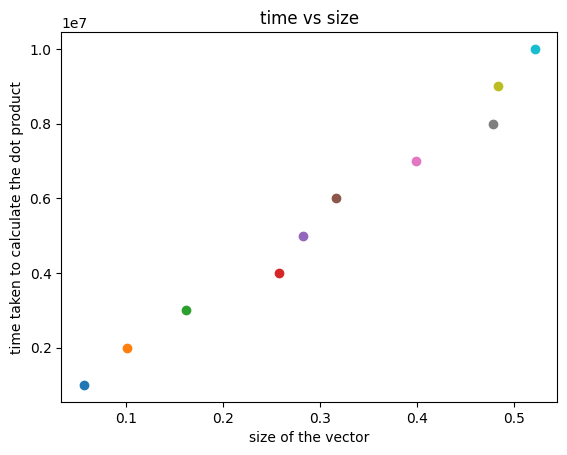

In [137]:
def fill_array(n):
    """Fills up the array with n 1s
    :parameter: (int) number of 1 in an array
    :retun: array with  n 1s"""
    a = np.zeros(n)
    for i in range (n):
        a[i] = 1
    return a

def dot_product():
    """Computes the dot protuct and computes the time to calculate 1 dot product. Stores the time taken for each dot product calculation
        in an array
        :return: (array) an array which stores all the time
        """
    time_array = np.zeros(10, dtype=float) # array to store time taken to calculate a dot product
    time_taken = np.zeros(10, dtype=float) # array to store time taken for 1 process
    pos = 0 # pos at which time value is stored
    for i in range(1000000,11000000,1000000):
        a = fill_array(i) # generating a vector 
        start = time.time() # start timer
        dot_product1(a,a) # calculate dot product
        end = time.time()  # stop timer
        print("size of vector = " ,str(a.size))
        time_array[pos] = end -start # calculate time difference

        plt.scatter(end -start, i) 
        time_taken[pos] = time_array[pos]/((2*i) -1)
        pos+=1
        print (a)
    mean =  statistics.mean(time_taken)
    print(time_array)
    print ("average time taken per process " + str(mean))
    plt.xlabel("size of the vector")
    plt.ylabel("time taken to calculate the dot product")
    plt.title("time vs size")
    plt.show()
dot_product()


We know that there are 2n-1 processes required to calculate the dot product of of 2 vectors oif size n. As n gets bigger, the -1 becomes more irrelevent. the code above calculates this be $$ 
\frac {\textrm{time taken for computing a dot product between two vectors of size n}}{2n-1}
$$

## Making Graphs

<font color = blue>

<font color = blue>
Computational Methods generally produce results in the form of long lists of data; this is not terribly convenient for actually understanding anything, without the use of graphics.  The most common, basic tool for graphing in Python is the library matplotlib.  After importing this library, use the internet to look up how a basic plot works, given two sets of data (x-coordinates and y-coordinates).  Then, create an example of how to use this method below.  (You will of course first have to generate the data itself.)  Make sure your example incorporates the following elements, which will be very useful for you to be able to control in the future.

1) Your graph should display two sets of data on the same plot

2) It should include labels for the x- and y-axes

3) It should include a title

4) It should use a plot legend to distinguish between the two data sets

5) You should directly control the size of the plot.

6) One set of data should be displayed as a connected line, while the other as a set of points

7) You should directly control the colors of the two data sets.

8) You should also directly control the ranges of the x-axis and y-axis

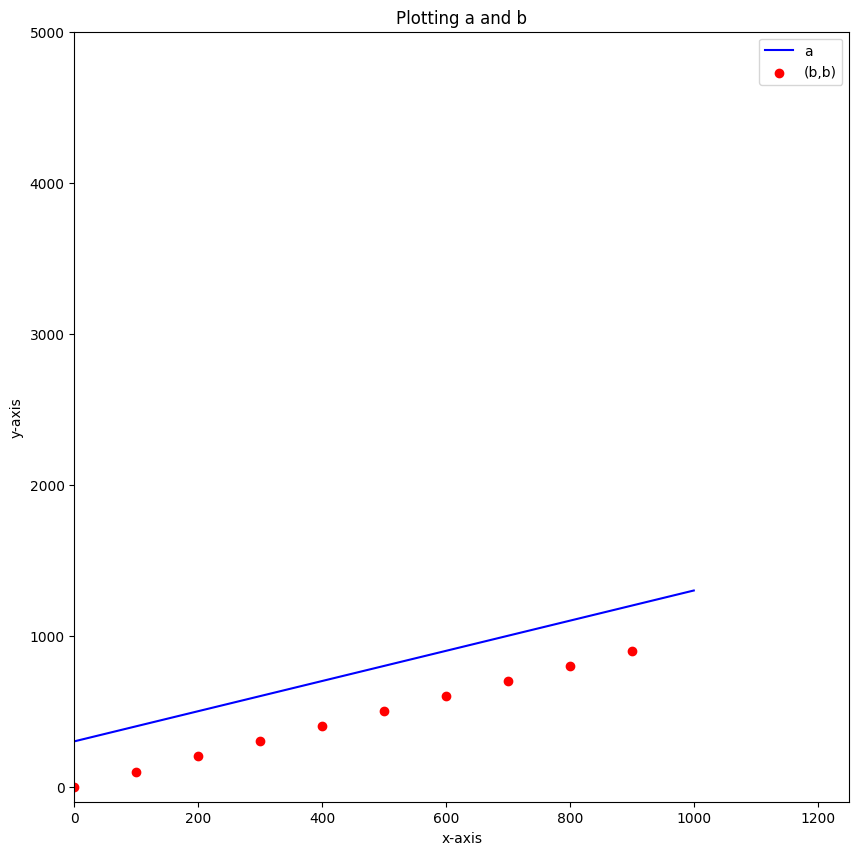

In [138]:
    a = np.zeros(1000)
    b = np.zeros(10)
    plt.figure(figsize=(10, 10))
    for i in range(1000):
        a[i] = i+300
    plt.plot(a, label = "a",color = "blue")
    for j in range (10):
        b[j] = j*100 
    plt.scatter(b,b, label = "(b,b)", color = "red")

    plt.xlim(0,1250) #x axis range
    plt.ylim(-100,5000) #y axis range
    plt.xlabel("x-axis") #x axis label
    plt.ylabel("y-axis") #y axis label
    plt.title("Plotting a and b") #title
    plt.legend()
    plt.show()

Making plots in python tends to be a multi function process. You can only plots datasets and not functions. Each customization such as plot labels and type of line is either a new function or a parameter to the the type of plot being plotted.